# CS 855 HW 5
## Dan Evans

Import Python libraries and set up the initial red and blue points, samples, initial weights, and plotting control switch. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

r1 = [0, 0]
r2 = [1, 0]
r3 = [0, 1]
b1 = [1, 1]

y1 = [1, 0, 0]
y2 = [1, 0, 1]
y3 = [1, 1, 0]
y4 = [1, 1, 1]
a0 = [-2, 0, 1]
do_plot = True

labels = [-1, -1, -1, 1]
samples = np.array([y1, y2, y3, y4])
weight = np.array(a0)

The line_factory function returns a line potting function generated from a weight vector.  The plot_split function plots the points and the half-plane divider.

In [22]:
def line_factory(_w):
    """return a function which will draw the half-plane division line 0 = bias + w1*x1 + w2*x2
    from the input weight vector [b, w1, w2]"""
    if 0 == _w[2]:
        raise Exception('coefficient of x2 cannot be 0')
    def _f(_x):
        return (-_w[0] - _w[1] * _x) / _w[2]
    return _f


def plot_split(_w, _f):
    """plot the points and the half-plane line if do_plot is True"""
    if not do_plot:
        return
    fig, ax = plt.subplots(1, 1)
    for xi, yi in [r1, r2, r3]:
        ax.plot(xi, yi, marker='o', color='red')
    for xi, yi in [b1]:
        ax.plot(xi, yi, marker='o', color='blue')
    ax.axis([-1, 2, -0.5, 2.5])
    ax.plot([-1, 2], [_f(-1), _f(2)])
    plt.show()
    

The epoch function will perform one iteration over all the samples, possibly modifying the weight vector several times, and return the modified weight vector, and a flag indicating the need for another iteration.

In [23]:
def epoch(_y, _w, _l):
    """
    :param _y: the n augmented samples
    :param _w: the initial weight vector
    :param _l: the n sample labels; -1 a negative sample, +1 a positive sample
    :return: a tuple (new weight vector, weight vector modified flag)
    """
    _n = _y.shape[0]  # the number of samples
    _e = False
    for _k in range(_n):
        _v = np.sum(_y[_k] * _w)
        if _l[_k] > 0 and _v <= 0:  # positive class error
            _w += _y[_k]
            _e = True
            print('positive class error: sample: {}, dot-product: {}, new weights: {}'.format(_y[_k], _v, _w))
            plot_split(_w, line_factory(_w))
        elif _l[_k] < 0 and _v > 0:  # negative class error
            _w -= _y[_k]
            _e = True
            print('negative class error: sample: {}, dot-product: {}, new weights: {}'.format(_y[_k], _v, _w))
            plot_split(_w, line_factory(_w))
        else:
            print('correct, label: {} sample: {}, dot-product: {}'.format(_l[_k], _y[_k], _v))
    return (_w, _e)


Plot the initial weight vector, then run an epoch and plot result.  If the again flag is true, another epoch needs to be run.

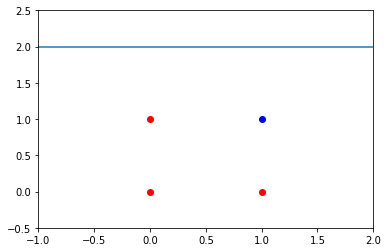

correct, label: -1 sample: [1 0 0], dot-product: -2
correct, label: -1 sample: [1 0 1], dot-product: -1
correct, label: -1 sample: [1 1 0], dot-product: -2
positive class error: sample: [1 1 1], dot-product: -1, new weights: [-1  1  2]


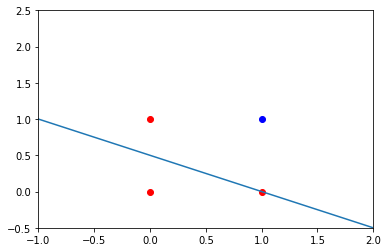

run another epoch: {} True


In [24]:
# do_plot = False
plot_split(weight, line_factory(weight))
(wv, again) = epoch(samples, weight, labels)
print('run another epoch: {}', again)

correct, label: -1 sample: [1 0 0], dot-product: -1
negative class error: sample: [1 0 1], dot-product: 1, new weights: [-2  1  1]


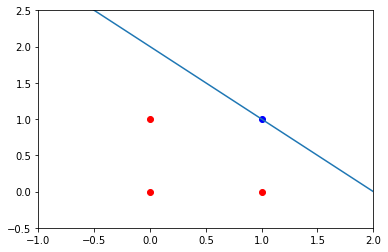

correct, label: -1 sample: [1 1 0], dot-product: -1
positive class error: sample: [1 1 1], dot-product: 0, new weights: [-1  2  2]


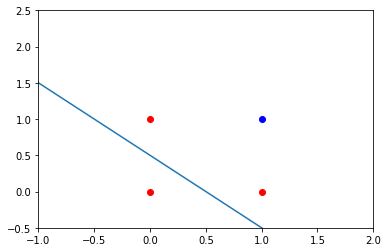

run another epoch: {} True


In [25]:
(wv, again) = epoch(samples, wv, labels)
print('run another epoch: {}', again)

correct, label: -1 sample: [1 0 0], dot-product: -1
negative class error: sample: [1 0 1], dot-product: 1, new weights: [-2  2  1]


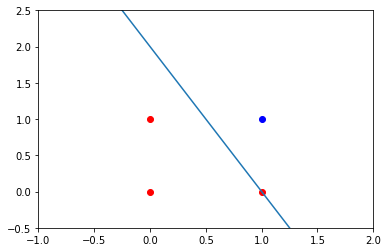

correct, label: -1 sample: [1 1 0], dot-product: 0
correct, label: 1 sample: [1 1 1], dot-product: 1
run another epoch: {} True


In [26]:
(wv, again) = epoch(samples, wv, labels)
print('run another epoch: {}', again)

In [27]:
(wv, again) = epoch(samples, wv, labels)
print('run another epoch: {}', again)

correct, label: -1 sample: [1 0 0], dot-product: -2
correct, label: -1 sample: [1 0 1], dot-product: -1
correct, label: -1 sample: [1 1 0], dot-product: 0
correct, label: 1 sample: [1 1 1], dot-product: 1
run another epoch: {} False


Go back and set do_plot to True or False to see or supress the plotting of the half-plane dividers.